In [1]:
#!pip install pandas-profiling
!pip install pyarrow
!pip install fastparquet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
#from pandas_profiling.utils.cache import cache_file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
archivo1 = pd.read_parquet('/content/drive/MyDrive/sample_data_0007_part_00.parquet', engine='fastparquet')
archivo1.head(3)

,merchant_id,_id,subsidiary,transaction_date,account_number,user_id,transaction_amount,transaction_type
0,075d178871d8d48502bf1f54887e52fe,1cccf3eb51fe9ae64233cb4ffd2d0f8b,7428212cf0193f799447ec0dfe53e4a0,2021-09-12 18:19:00,dd8fdb4414156566f4d4bc22ab841302,388f45f8132c7386067b2de8962d1d9f,118.889100,CREDITO
1,075d178871d8d48502bf1f54887e52fe,b4bdd8e5ad6a2c2990396dcb65372af5,9d35d3b93eee57d56d5f638cdd7ba436,2021-09-12 18:18:54,7685f385afbbc08acecc47ba697f6bee,82dbd24adbfee4a4fa46d75073567ffd,14.266692,CREDITO
2,075d178871d8d48502bf1f54887e52fe,1fdacd107a477eb26dd649e9161cc211,902a37737a1b16712126e58173b86d9f,2021-09-12 18:18:12,b59df7a42445e88ee1ab506384c395d5,ea9323f9e24171e47d8a671f86a51b5e,23.777820,CREDITO


In [4]:
cantidad_nulos_por_columna = archivo1.isnull().sum()
cantidad_nulos_por_columna

merchant_id           0
_id                   0
subsidiary            0
transaction_date      0
account_number        0
user_id               0
transaction_amount    0
transaction_type      0
dtype: int64

In [5]:
#describe, info, columns, size
archivo1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10758500 entries, 0 to 10758499
Data columns (total 8 columns):
 #   Column              Dtype         
---  ------              -----         
 0   merchant_id         object        
 1   _id                 object        
 2   subsidiary          object        
 3   transaction_date    datetime64[ns]
 4   account_number      object        
 5   user_id             object        
 6   transaction_amount  float64       
 7   transaction_type    object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 656.6+ MB


In [6]:
archivo1.describe()

,transaction_amount
count,1.075850e+07
mean,1.911823e+02
std,2.408294e+02
min,5.944455e+00
25%,3.566673e+01
50%,1.070002e+02
75%,2.377782e+02
max,3.210006e+03


In [7]:
archivo1['transaction_type'].unique()

array(['CREDITO', 'DEBITO'], dtype=object)

In [8]:
data_mapped = archivo1.copy()

#Cambiar variables a numericas




In [9]:
#variable bianria que se puede cambiar a una equivalencia numerica
data_mapped["transaction_type"] = data_mapped["transaction_type"].map({
    "CREDITO": 0,
    "DEBITO": 1
}).astype(int)

In [10]:
#Preprocessing para el numero de cuenta y el user ID
le = preprocessing.LabelEncoder()
le.fit(data_mapped['account_number'].astype(str))
data_mapped['account_number'] = le.transform(data_mapped['account_number'].astype(str))

In [11]:
le.fit(data_mapped['user_id'].astype(str))
data_mapped['user_id'] = le.transform(data_mapped['user_id'].astype(str))

In [12]:
#monto de transaccion a numerico
data_mapped['transaction_amount'] = data_mapped['transaction_amount'].astype(int)

In [17]:
archivo1['user_id'].value_counts()

5e674596af22a66e826bf15b2a363cce    1983
d3720205290ca7444d216167dd4cb0b1    1797
e77fc30bb3bec8bf45a35b535b292047    1476
93bb7c11b0b58e233f56f50cd70c1a82    1193
0457e033945b37b94d7f396aa07daaa1    1162
                                    ... 
d3f30a0fca42c21a0c29d69272a901e5       1
4074309048f549d5dd2e28f5be33393d       1
65615b557df2b09b27cab4b0a231535c       1
69f13c8a906f82819e49c7a820f79d41       1
9b4a7ac86ed81ad330366e766c739808       1
Name: user_id, Length: 1951790, dtype: int64

In [14]:
data_mapped['user_id'].value_counts()

719239     1983
1611848    1797
1764842    1476
1126857    1193
32981      1162
           ... 
1615750       1
490732        1
772255        1
807332        1
1184452       1
Name: user_id, Length: 1951790, dtype: int64

In [13]:
#transaccion_ date se convierte en un formato de tiempo Unix
data_mapped['transaction_date'] = data_mapped['transaction_date'].astype('int64')// 10**9

In [16]:
data_mapped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10758500 entries, 0 to 10758499
Data columns (total 8 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   merchant_id         object
 1   _id                 object
 2   subsidiary          object
 3   transaction_date    int64 
 4   account_number      int64 
 5   user_id             int64 
 6   transaction_amount  int64 
 7   transaction_type    int64 
dtypes: int64(5), object(3)
memory usage: 656.6+ MB


In [17]:
archivo1['transaction_date'].value_counts()

2021-07-10 18:38:30    17
2021-06-21 12:22:44    16
2021-06-20 12:12:38    14
2021-08-05 11:27:35    14
2021-06-11 11:43:42    14
                       ..
2021-10-27 18:59:10     1
2021-10-27 18:57:45     1
2021-10-10 17:38:46     1
2021-10-09 10:01:26     1
2021-11-29 14:07:30     1
Name: transaction_date, Length: 7619331, dtype: int64

In [18]:
data_mapped['transaction_date'].value_counts()

1625942310    17
1624278164    16
1624191158    14
1628162855    14
1623411822    14
              ..
1635361150     1
1635361065     1
1633887526     1
1633773686     1
1638194850     1
Name: transaction_date, Length: 7619331, dtype: int64

In [18]:
data_mapped.describe()

,account_number,user_id,transaction_amount,transaction_type
count,1.075850e+07,1.075850e+07,1.075850e+07,1.075850e+07
mean,9.782768e+05,9.750100e+05,1.906075e+02,7.986651e-01
std,5.650813e+05,5.634376e+05,2.408784e+02,4.009978e-01
min,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00
25%,4.888580e+05,4.879410e+05,3.500000e+01,1.000000e+00
50%,9.794270e+05,9.741635e+05,1.070000e+02,1.000000e+00
75%,1.467363e+06,1.462337e+06,2.370000e+02,1.000000e+00
max,1.957112e+06,1.951789e+06,3.210000e+03,1.000000e+00


In [23]:
import math
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [25]:
data_mapped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10758500 entries, 0 to 10758499
Data columns (total 8 columns):
 #   Column              Dtype         
---  ------              -----         
 0   merchant_id         object        
 1   _id                 object        
 2   subsidiary          object        
 3   transaction_date    datetime64[ns]
 4   account_number      int64         
 5   user_id             int64         
 6   transaction_amount  int64         
 7   transaction_type    int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 656.6+ MB


<ipython-input-26-559f2bd5e288>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_hist = data_mapped.drop(['merchant_id','_id', 'subsidiary'], 1)


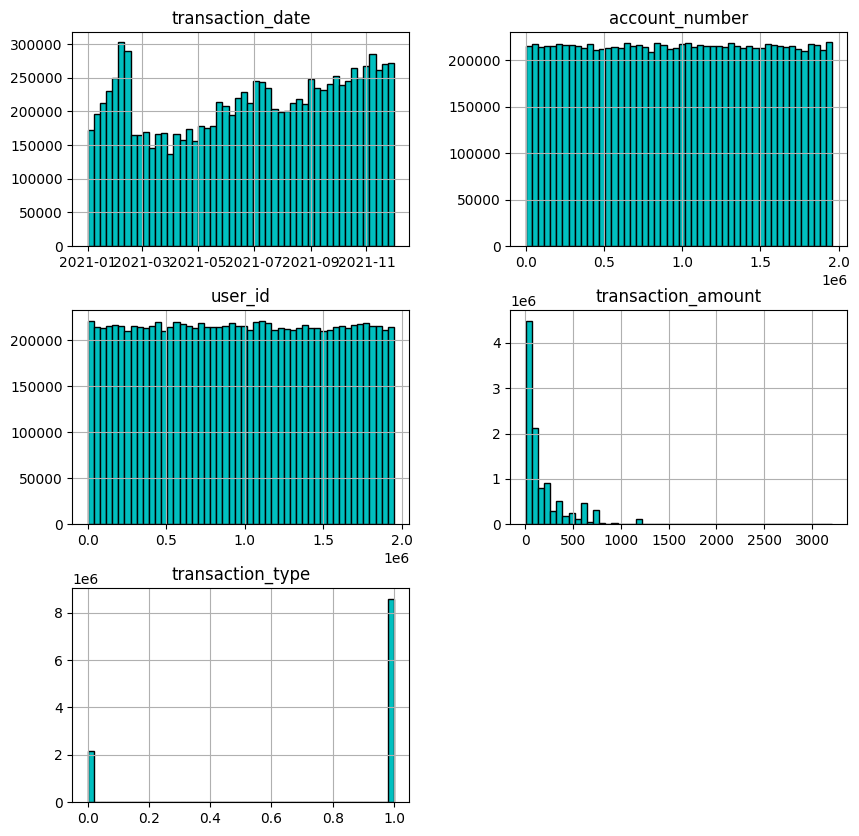

In [26]:
# create histograms on all features
df_hist = data_mapped.drop(['merchant_id','_id', 'subsidiary'], 1)
df_hist.hist(figsize=(10,10), bins = 50, color = "c", edgecolor='black')
plt.show()

<ipython-input-27-f6d21fd2dc9c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  f_cor = df_hist.corr()


<Axes: >

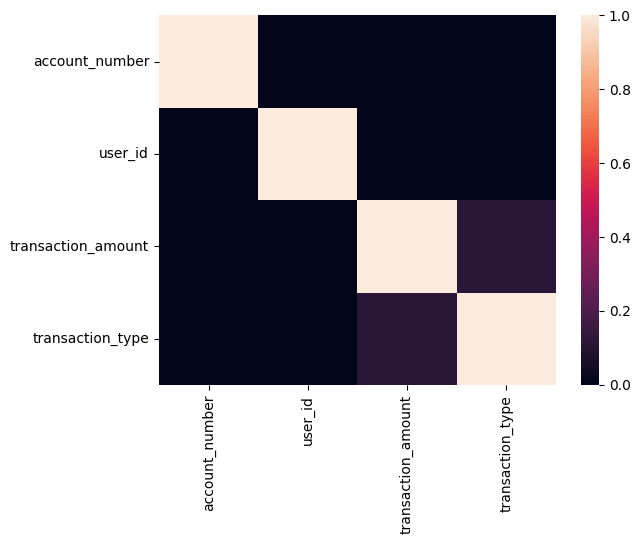

In [27]:
f_cor = df_hist.corr()
sns.heatmap(f_cor)

Se tienen un conjunto de datos no etiquetado, por lo cual se tiene que cosniderar en aprendizaje no supervisado

# K-means


Se hace el analisis de datos por clusters. Se hace uso de K- MEANS para dos combinaciones de variables diferentes.



 con estas variables

 2   subsidiary          object        
 3   transaction_date    datetime64[ns]
 4   account_number      int64         
 5   user_id             int64         
 6   transaction_amount  int64         
 7   transaction_type    int64

In [13]:
x1 = data_mapped[['user_id','account_number','transaction_type','transaction_amount','transaction_date']]
x1

,user_id,account_number,transaction_type,transaction_amount,transaction_date
0,431058,1694309,0,118,1631470740
1,997148,907422,0,14,1631470734
2,1788248,1389242,0,23,1631470692
3,442627,471199,0,95,1631470673
4,1205416,538797,0,23,1631470673
...,...,...,...,...,...
10758495,804521,995107,0,237,1638200896
10758496,1780612,923737,0,26,1638269853
10758497,406783,1105440,0,594,1638270067
10758498,406783,1105440,0,172,1638270125


In [14]:
#escalar datos
from sklearn.preprocessing import MinMaxScaler

escalador = MinMaxScaler().fit(x1.values)

x1 = pd.DataFrame(escalador.transform(x1.values),
                       columns=[ 'user_id', 'account_number', 'transaction_type', 'transaction_amount',
       'transaction_date'])
x1.head(3)

,user_id,account_number,transaction_type,transaction_amount,transaction_date
0,0.220853,0.865719,0.0,0.035257,0.762764
1,0.510889,0.463654,0.0,0.002808,0.762764
2,0.916210,0.709843,0.0,0.005616,0.762763


In [27]:
#wss
wcss1 = list()
for i in range(1, 7):
    kmeans = KMeans(i)
    kmeans.fit(x1)
    wcss1.append(kmeans.inertia_)
wcss1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[4531345.755149075,
 2795622.6018254026,
 2258839.1332883593,
 1912602.9017182284,
 1669972.737673064,
 1488676.5156314117]

Para determianr el numero de cluster, hacemos uso del metodo del codo el cual utiliza la distancia media de las observaciones a su centroide

Text(0, 0.5, 'Within-cluster sum of squares')

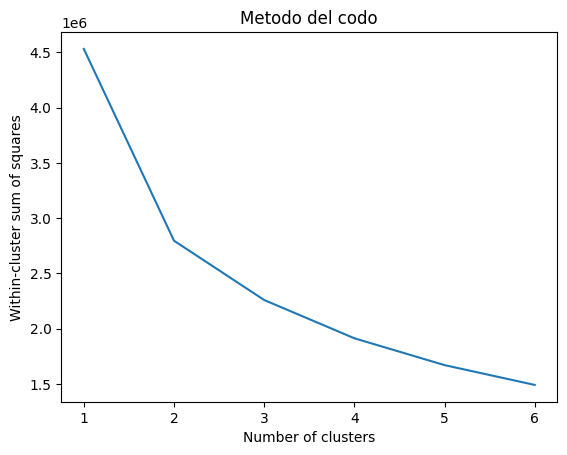

In [ ]:
number_clusters = range(1, 7)
plt.plot(number_clusters, wcss1)
plt.title("Metodo del codo")
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')

In [28]:
#para esta combinacion de variables, el numero de clusters son 2

n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters)
x1['cluster'] = kmeans.fit_predict(x1)

#para la visiualización tomamos los componentes principales
# n_componentes = 2

pca = PCA(n_components=2)
data_pca = pca.fit_transform(x1.drop('cluster', axis=1))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


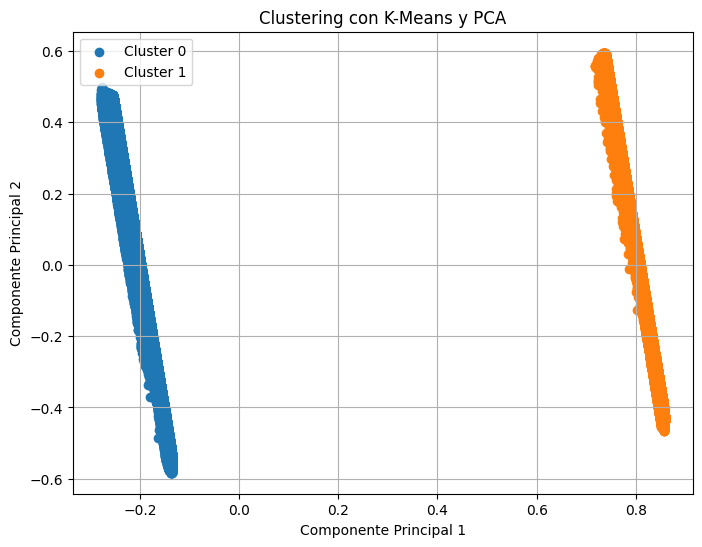

In [29]:

plt.figure(figsize=(8, 6))

for cluster_num in range(n_clusters):
    plt.scatter(
        data_pca[x1['cluster'] == cluster_num, 0],
        data_pca[x1['cluster'] == cluster_num, 1],
        label=f'Cluster {cluster_num}'
    )

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clustering con K-Means y PCA')
plt.legend()
plt.grid(True)
plt.show()

# *Variables (3)*

Seleccionamos las variables que consideramos más relevantes, dado el enfoque del problema, el usuario, el monto de transacción y la fecha de transacción

In [ ]:
x = data_mapped[['user_id','transaction_amount','transaction_date']]
x

In [ ]:
#escalar datos
from sklearn.preprocessing import MinMaxScaler

escalador = MinMaxScaler().fit(x.values)

x = pd.DataFrame(escalador.transform(x.values),
                       columns=[ 'user_id',
 'transaction_amount',
 'transaction_date'])
x


,user_id,transaction_amount,transaction_date
0,0.220853,0.035257,0.762764
1,0.510889,0.002808,0.762764
2,0.916210,0.005616,0.762763
3,0.226780,0.028081,0.762762
4,0.617595,0.005616,0.762762
...,...,...,...
10758495,0.412197,0.072387,0.995985
10758496,0.912297,0.006552,0.998374
10758497,0.208415,0.183775,0.998381
10758498,0.208415,0.052106,0.998384


In [ ]:
#wss
wcss = list()
for i in range(1, 7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
wcss


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[1904491.3675386622,
 1191155.8774614702,
 758028.1098798573,
 519325.6171949827,
 444415.1896839356,
 379032.82249473745]

In [ ]:
number_clusters = range(1, 7)
plt.plot(number_clusters, wcss)
plt.title("Metodo del codo")
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')

In [ ]:
from sklearn.decomposition import PCA


In [ ]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
x['cluster'] = kmeans.fit_predict(x)

pca = PCA(n_components=2)
data_pca = pca.fit_transform(x.drop('cluster', axis=1))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


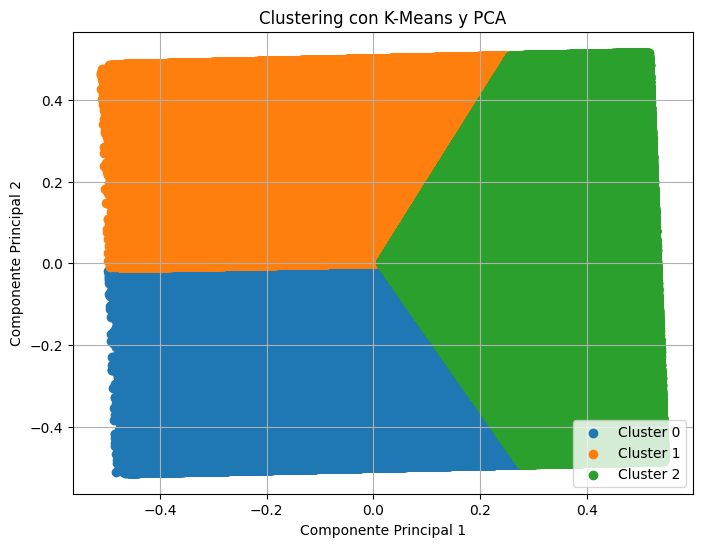

In [ ]:
plt.figure(figsize=(8, 6))

for cluster_num in range(n_clusters):
    plt.scatter(
        data_pca[x['cluster'] == cluster_num, 0],
        data_pca[x['cluster'] == cluster_num, 1],
        label=f'Cluster {cluster_num}'
    )

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clustering con K-Means y PCA')
plt.legend()
plt.grid(True)
plt.show()

# Isolation Forest
Se hace uso de un modelo de isolation forest, dado l anuraleza de los datos y el objetivo de encontrar las anomalias en ese conjunto de datos que me represente un Fraccionamiento Transaccional

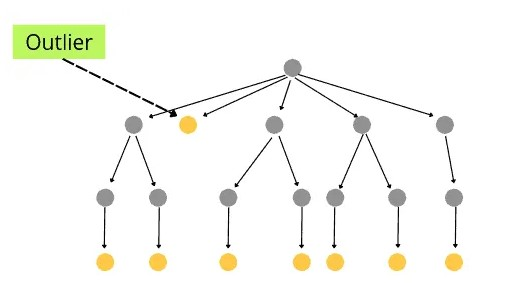

In [15]:
x1

,user_id,account_number,transaction_type,transaction_amount,transaction_date
0,0.220853,0.865719,0.0,0.035257,0.762764
1,0.510889,0.463654,0.0,0.002808,0.762764
2,0.916210,0.709843,0.0,0.005616,0.762763
3,0.226780,0.240762,0.0,0.028081,0.762762
4,0.617595,0.275302,0.0,0.005616,0.762762
...,...,...,...,...,...
10758495,0.412197,0.508457,0.0,0.072387,0.995985
10758496,0.912297,0.471990,0.0,0.006552,0.998374
10758497,0.208415,0.564832,0.0,0.183775,0.998381
10758498,0.208415,0.564832,0.0,0.052106,0.998384


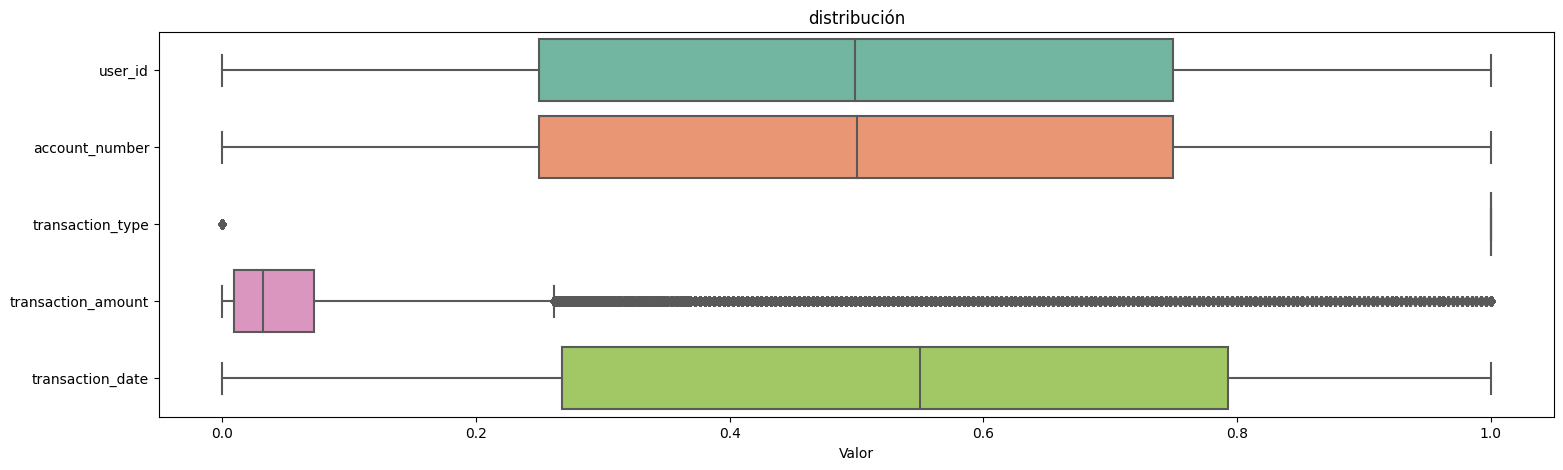

In [17]:
boxplot = sns.boxplot(data=x1, orient = 'h', palette ='Set2', whis=3)
plt.title('distribución')
plt.xlabel('Valor')
boxplot.figure.set_size_inches(18,5)

In [19]:
x = data_mapped[['user_id','transaction_amount','transaction_date']]

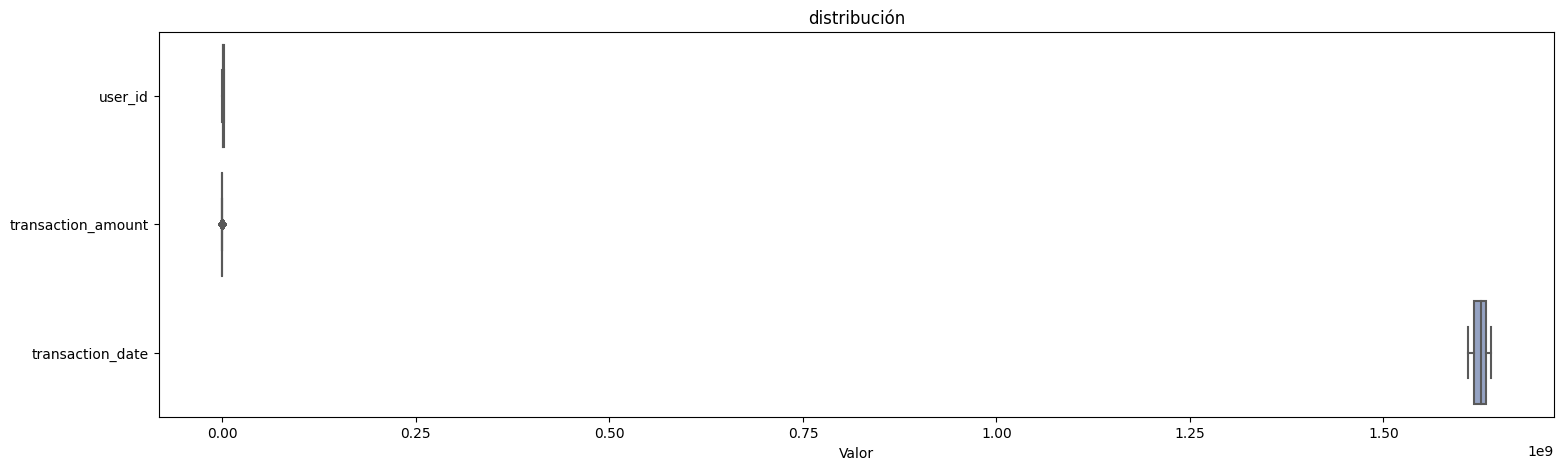

In [20]:
boxplot = sns.boxplot(data=x, orient = 'h', palette ='Set2', whis=3)
plt.title('distribución')
plt.xlabel('Valor')
boxplot.figure.set_size_inches(18,5)

In [17]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [18]:
contamination = 0.01

In [19]:
model_IF = IsolationForest(contamination=float(0.1),random_state=42)

In [19]:
data_mapped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10758500 entries, 0 to 10758499
Data columns (total 8 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   merchant_id         object
 1   _id                 object
 2   subsidiary          object
 3   transaction_date    int64 
 4   account_number      int64 
 5   user_id             int64 
 6   transaction_amount  int64 
 7   transaction_type    int64 
dtypes: int64(5), object(3)
memory usage: 656.6+ MB


In [14]:
data_num = data_mapped[['user_id','account_number','transaction_type','transaction_amount','transaction_date']]
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10758500 entries, 0 to 10758499
Data columns (total 5 columns):
 #   Column              Dtype
---  ------              -----
 0   user_id             int64
 1   account_number      int64
 2   transaction_type    int64
 3   transaction_amount  int64
 4   transaction_date    int64
dtypes: int64(5)
memory usage: 410.4 MB


In [22]:
#no es necesario escalarlo, pero se onsidera una buena practica
from sklearn.preprocessing import MinMaxScaler
escalador = MinMaxScaler().fit(data_num.values)
data_num = pd.DataFrame(escalador.transform(data_num.values),
                       columns=['user_id','account_number','transaction_type','transaction_amount','transaction_date'])
data_num.head(3)

,user_id,account_number,transaction_type,transaction_amount,transaction_date
0,0.220853,0.865719,0.0,0.035257,0.762764
1,0.510889,0.463654,0.0,0.002808,0.762764
2,0.916210,0.709843,0.0,0.005616,0.762763


In [20]:
model_IF.fit(data_num)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, random_state=42)

In [21]:
data_num['anomaly_scores'] = model_IF.decision_function(data_num)

<ipython-input-21-75a1a6d5e219>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_num['anomaly_scores'] = model_IF.decision_function(data_num)


In [41]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10758500 entries, 0 to 10758499
Data columns (total 6 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             int64  
 1   account_number      int64  
 2   transaction_type    int64  
 3   transaction_amount  int64  
 4   transaction_date    int64  
 5   anomaly_scores      float64
dtypes: float64(1), int64(5)
memory usage: 492.5 MB


In [19]:
data_num.head(3)

,user_id,account_number,transaction_type,transaction_amount,transaction_date,anomaly_scores
0,431058,1694309,0,118,1631470740,0.020595
1,997148,907422,0,14,1631470734,0.061583
2,1788248,1389242,0,23,1631470692,0.029184


In [22]:
data_num['anomaly'] = pd.Series(model_IF.predict(data_num[['user_id','account_number','transaction_type','transaction_amount','transaction_date']]))
data_num

<ipython-input-22-976d3338ff15>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_num['anomaly'] = pd.Series(model_IF.predict(data_num[['user_id','account_number','transaction_type','transaction_amount','transaction_date']]))


,user_id,account_number,transaction_type,transaction_amount,transaction_date,anomaly_scores,anomaly
0,431058,1694309,0,118,1631470740,0.020595,1
1,997148,907422,0,14,1631470734,0.061583,1
2,1788248,1389242,0,23,1631470692,0.029184,1
3,442627,471199,0,95,1631470673,0.032544,1
4,1205416,538797,0,23,1631470673,0.048639,1
...,...,...,...,...,...,...,...
10758495,804521,995107,0,237,1638200896,-0.010461,-1
10758496,1780612,923737,0,26,1638269853,-0.012678,-1
10758497,406783,1105440,0,594,1638270067,-0.060095,-1
10758498,406783,1105440,0,172,1638270125,-0.010881,-1


In [23]:
data_num['anomaly'].value_counts()


 1    9682651
-1    1075849
Name: anomaly, dtype: int64

In [27]:
def outlier_plot(data, outlier_method_name, x_var, y_var,
                 xaxis_limits=[0,1], yaxis_limits=[0,1]):

    print(f'Outlier Method: {outlier_method_name}')

    # Create a dynamic title based on the method
    method = f'{outlier_method_name}_anomaly'

    # Print out key statistics
    print(f"Number of anomalous values {len(data[data['anomaly']==-1])}")
    print(f"Number of non anomalous values  {len(data[data['anomaly']== 1])}")
    print(f'Total Number of Values: {len(data)}')

    # Create the chart using seaborn
    g = sns.FacetGrid(data, col='anomaly', height=4, hue='anomaly', hue_order=[1,-1])
    g.map(sns.scatterplot, x_var, y_var)
    g.fig.suptitle(f'Outlier Method: {outlier_method_name}', y=1.10, fontweight='bold')
    g.set(xlim=xaxis_limits, ylim=yaxis_limits)
    axes = g.axes.flatten()
    axes[0].set_title(f"Outliers\n{len(data[data['anomaly']== -1])} points")
    axes[1].set_title(f"Inliers\n {len(data[data['anomaly']==  1])} points")
    return g

Outlier Method: Isolation Forest
Number of anomalous values 1075849
Number of non anomalous values  9682651
Total Number of Values: 10758500


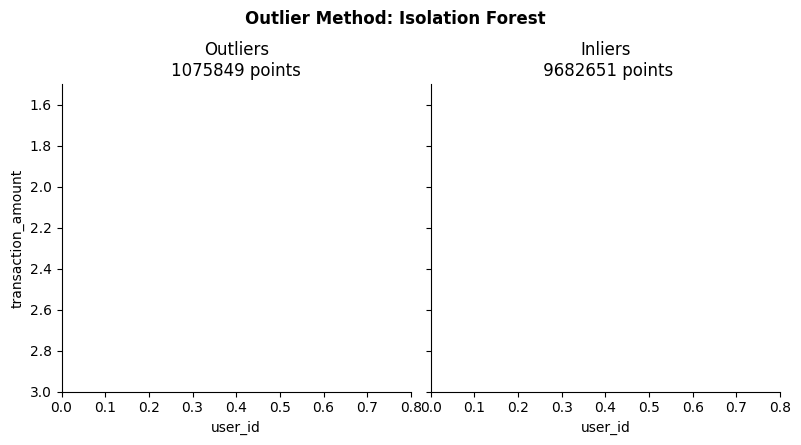

In [28]:
# Valores de los rangos para los ejes x e y
x_range = [1606573486.7, 1641202526.3]
y_range = [-315.5, 3530.5]

# Llama a la función outlier_plot con los límites especificados
outlier_plot(data_num, 'Isolation Forest', 'user_id', 'transaction_amount', [0, 0.8], [3, 1.5])


Podemos hacer modoficaciones en el valor de contaminación nos permite identificar qué porcentaje de valores deben identificarse como valores atípicos, pero elegir ese valor puede ser complicado. En este caso usamos la convencion general que es establecer un 10%.

In [30]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1075849 entries, 10 to 10758498
Data columns (total 7 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   user_id             1075849 non-null  int64  
 1   account_number      1075849 non-null  int64  
 2   transaction_type    1075849 non-null  int64  
 3   transaction_amount  1075849 non-null  int64  
 4   transaction_date    1075849 non-null  int64  
 5   anomaly_scores      1075849 non-null  float64
 6   anomaly             1075849 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 65.7 MB


# IQR

In [68]:
#Este df corresponde a todos los datos que el modleo detecta como una anomalia, aqui se hace un analisis sobre esos datos con el caluclo de una nueva variable
#que representa el numero de transccaiones relizadas por una cuenta en un rango temporal de 24horas.

In [31]:
data_num = data_num[data_num['anomaly'] == -1]
data_num

,user_id,account_number,transaction_type,transaction_amount,transaction_date,anomaly_scores,anomaly
10,1718016,420480,0,475,1631470640,-0.025035,-1
14,1718016,420480,0,392,1631470632,-0.018127,-1
21,199495,1720110,0,594,1631470561,-0.059330,-1
22,1408107,1246372,0,475,1631470576,-0.005860,-1
25,1946637,76671,0,356,1631470523,-0.046953,-1
...,...,...,...,...,...,...,...
10758494,478716,1216243,0,118,1638204890,-0.009250,-1
10758495,804521,995107,0,237,1638200896,-0.010461,-1
10758496,1780612,923737,0,26,1638269853,-0.012678,-1
10758497,406783,1105440,0,594,1638270067,-0.060095,-1


In [42]:
data_num = data_num[data_num['anomaly'] == -1]
data_tem = data_num[['user_id','transaction_date']]

In [43]:
data_tem['transaction_date'] = pd.to_datetime(data_tem['transaction_date'], unit='s')

<ipython-input-43-1106c0f36c99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tem['transaction_date'] = pd.to_datetime(data_tem['transaction_date'], unit='s')


In [44]:
data_tem

,user_id,transaction_date
10,1718016,2021-09-12 18:17:20
14,1718016,2021-09-12 18:17:12
21,199495,2021-09-12 18:16:01
22,1408107,2021-09-12 18:16:16
25,1946637,2021-09-12 18:15:23
...,...,...
10758494,478716,2021-11-29 16:54:50
10758495,804521,2021-11-29 15:48:16
10758496,1780612,2021-11-30 10:57:33
10758497,406783,2021-11-30 11:01:07


In [45]:
data_tem['transaction_date'] = pd.to_datetime(data_tem['transaction_date'])

# Ordenar el DataFrame por la columna 'transaction_date'
data_tem = data_tem.sort_values('transaction_date')

# Definir una función para calcular el número de transacciones en una ventana de tiempo de 24 horas
def count_transactions_24h(group):
    return group.rolling('24H', on='transaction_date')['transaction_date'].count()

# Calcular el número de transacciones en una ventana de tiempo de 24 horas para cada 'user_id'
data_tem['transactions_24h'] = data_tem.groupby('user_id', group_keys=False).apply(count_transactions_24h).reset_index(drop=True)

<ipython-input-45-7708ead735e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tem['transaction_date'] = pd.to_datetime(data_tem['transaction_date'])


In [46]:
data_tem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1075849 entries, 9196651 to 8764063
Data columns (total 3 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   user_id           1075849 non-null  int64         
 1   transaction_date  1075849 non-null  datetime64[ns]
 2   transactions_24h  255074 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 32.8 MB


In [56]:
data_tem = data_tem[data_tem['transactions_24h'] >= 1]
data_tem

,user_id,transaction_date,transactions_24h
868491,298342,2021-01-02 06:35:44,2.0
868699,298342,2021-01-02 06:38:29,1.0
868700,1684512,2021-01-02 07:07:21,1.0
868703,45349,2021-01-02 07:40:48,1.0
868705,330297,2021-01-02 07:48:06,1.0
...,...,...,...
365259,1712258,2021-11-29 20:41:53,1.0
365264,148118,2021-11-29 20:42:09,1.0
365263,550093,2021-11-29 20:42:14,1.0
365262,1623283,2021-11-29 20:42:14,1.0


In [58]:
data_tem['transactions_24h'].value_counts()

1.0      208373
2.0       25384
3.0        6643
4.0        3077
5.0        1559
          ...  
148.0         1
117.0         1
130.0         1
144.0         1
128.0         1
Name: transactions_24h, Length: 141, dtype: int64

In [59]:
df_ordenado = data_tem.sort_values(by='transaction_date')
df_ordenado

,user_id,transaction_date,transactions_24h
868491,298342,2021-01-02 06:35:44,2.0
868699,298342,2021-01-02 06:38:29,1.0
868700,1684512,2021-01-02 07:07:21,1.0
868703,45349,2021-01-02 07:40:48,1.0
868705,330297,2021-01-02 07:48:06,1.0
...,...,...,...
365259,1712258,2021-11-29 20:41:53,1.0
365264,148118,2021-11-29 20:42:09,1.0
365262,1623283,2021-11-29 20:42:14,1.0
365263,550093,2021-11-29 20:42:14,1.0


In [66]:
serie = df_ordenado[['transaction_date','transactions_24h']]
serie


,transaction_date,transactions_24h
868491,2021-01-02 06:35:44,2.0
868699,2021-01-02 06:38:29,1.0
868700,2021-01-02 07:07:21,1.0
868703,2021-01-02 07:40:48,1.0
868705,2021-01-02 07:48:06,1.0
...,...,...
365259,2021-11-29 20:41:53,1.0
365264,2021-11-29 20:42:09,1.0
365262,2021-11-29 20:42:14,1.0
365263,2021-11-29 20:42:14,1.0


In [70]:
serie['transactions_24h'].value_counts()

1.0      208373
2.0       25384
3.0        6643
4.0        3077
5.0        1559
          ...  
148.0         1
117.0         1
130.0         1
144.0         1
129.0         1
Name: transactions_24h, Length: 141, dtype: int64

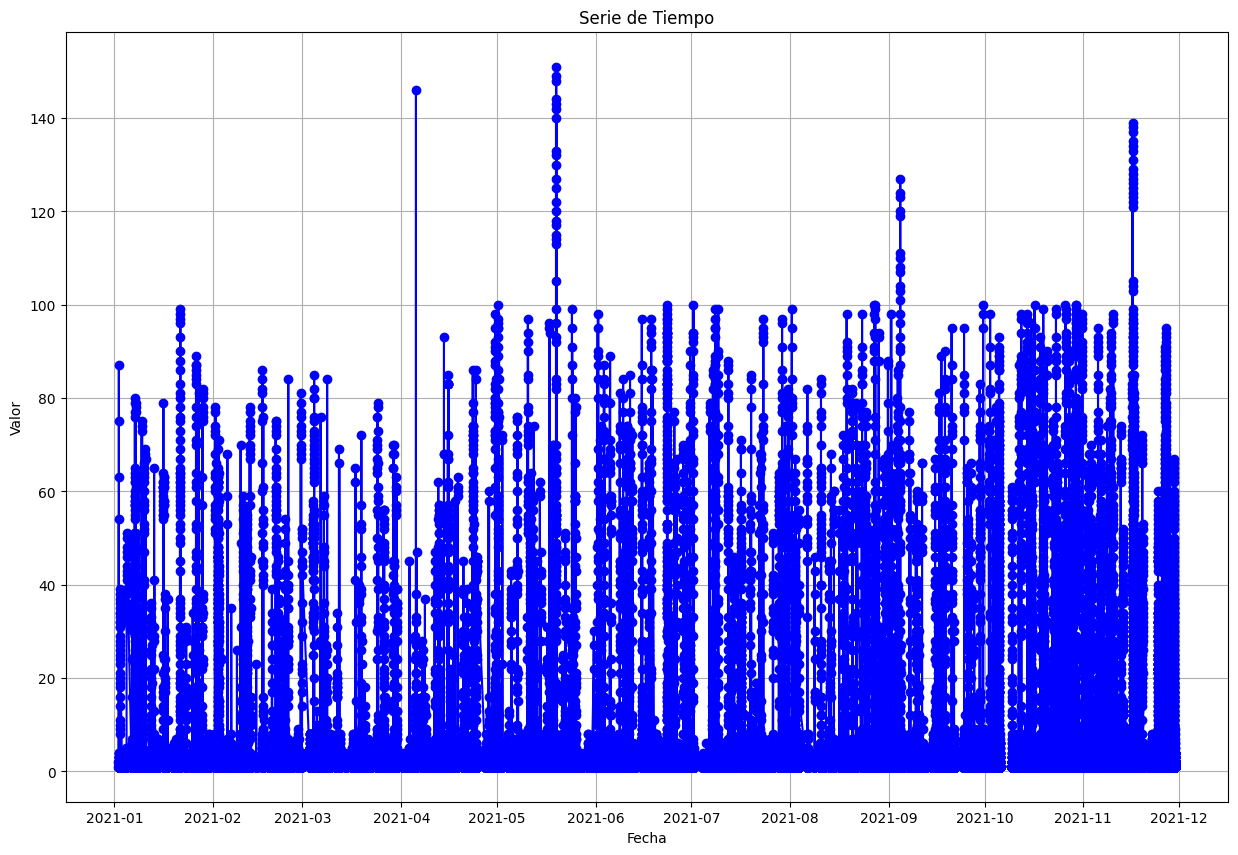

In [67]:
serie.set_index('transaction_date', inplace=True)

# Graficar la serie de tiempo, para conocer el comportamiento de las anomalias y los puntos mas alejados respecto a la nueva variable
plt.figure(figsize=(15, 10))
plt.plot(serie.index, serie['transactions_24h'], marker='o', linestyle='-', color='b')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Serie de Tiempo')
plt.grid(True)
plt.show()

In [62]:
q1 = serie['transactions_24h'].quantile(0.25) #primer cuartil
print("q1: ", q1)
q3= serie['transactions_24h'].quantile(0.75) #tercer
print("q3: ", q3)

#rango intercuartil
iqr= q3-q1
print("iqr: ", iqr)

mediana = serie['transactions_24h'].median()
print("mediana: ", mediana)
valor_min = serie['transactions_24h'].min()
print("min: ", valor_min)
valor_max = serie['transactions_24h'].max()
print("max: ", valor_max)

q1:  1.0
q3:  1.0
iqr:  0.0
mediana:  1.0
min:  1.0
max:  151.0


In [63]:
#calcular bigotitos
b1 = (q1-1.5*iqr)
print('b1: ',b1)

b2 = (q3+1.5*iqr)
print('b2: ',b2)

b1:  1.0
b2:  1.0


Se intento realizar una nueva deteccion de outiliers, respcto a la neuva variable, no fue provechosa dado que el valor del iqr no genera valores de interes.

*Dado el objetivo del problema y la ventana temporal de aproximadamente 24 horas en la que se debe determinar el proceso de fraccionamiento, se sugiere realizar una ingesta diaria de los datos. A partir de esta ingesta diaria, se podrá monitorear el comportamiento de los datos y detectar anomalías que puedan surgir durante el proceso.*

*El enfoque de ingesta diaria permitirá tener una visión más actualizada y granular de los datos, lo que facilitará la detección temprana de cualquier desviación o comportamiento inusual en el proceso. Además, al utilizar un intervalo de tiempo específico para analizar los datos, se podrá centrar la atención en la ventana de 24 horas y evaluar el rendimiento de manera más efectiva.*

*Con la ingesta diaria y el monitoreo regular, el sistema estará preparado para detectar y corregir posibles anomalías o problemas en el proceso de fraccionamiento de manera oportuna, lo que contribuirá a mejorar la eficiencia y la calidad de los resultados obtenidos.*